This example is based on the following online resources

## Datacamp Machine Learning (Deep learning)

This example is an introduction to deep learning (an advanced type of machine learning), however most of the example focuses on the visualization and data exploration steps that need to be done before machine learning.  So the example is useful even if the deep learning part won't run on your machine (it might not because deep learning requires special libraries and a good processor... give it a try if you time though, especially if you are a grad student)

https://www.datacamp.com/community/tutorials/deep-learning-python

## Stackoverflow convert categical data to numbers

This step is needed to apply some visualization and machine learning algorithms to data

https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe


In [49]:
import pandas as pd
data = pd.read_csv('Nehla_Gaholot_HR-Employee-Attrition.csv')

In [69]:
# take a look at the shape of the dataset
data.shape

(1470, 7)

In [50]:
# and the first few rows
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [54]:
# let's look at the collumn names... lots of columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [70]:
# extract only a few columns to make things more manageable for an example (in a real application you would keeep all the 
# columns, assuming they are all of interest)
data = data[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'Education', 'PercentSalaryHike']]

In [71]:
# now look at the shape... it should be smaller
data.shape

(1470, 7)

In [72]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'Education', 'PercentSalaryHike'],
      dtype='object')

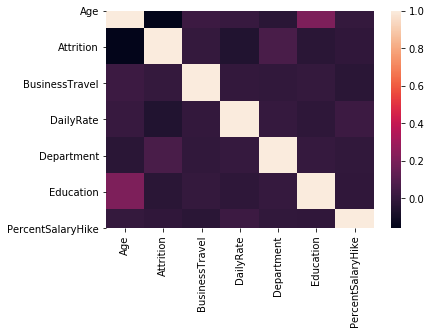

In [73]:
# use seaborn to look at the heat map (inspired by https://www.datacamp.com/community/tutorials/deep-learning-python)

import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [60]:
# hmmm.. some columns aren't plotted... why??
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,PercentSalaryHike
0,41,Yes,Travel_Rarely,1102,Sales,2,11
1,49,No,Travel_Frequently,279,Research & Development,1,23
2,37,Yes,Travel_Rarely,1373,Research & Development,2,15
3,33,No,Travel_Frequently,1392,Research & Development,4,11
4,27,No,Travel_Rarely,591,Research & Development,1,12


In [74]:
# look at the datatypes
data.dtypes

Age                  int64
Attrition             int8
BusinessTravel        int8
DailyRate            int64
Department            int8
Education            int64
PercentSalaryHike    int64
dtype: object

In [75]:
# the categorial data (ie names not numbers) aren't plotted... we can deal with this but 
# first make sure the categorical columns are categorial (for some reason pandas labels them as objects)
data.Attrition = data.Attrition.astype('category')
data.BusinessTravel = data.BusinessTravel.astype('category')
data.Department = data.Department.astype('category')


In [76]:
data.dtypes

Age                     int64
Attrition            category
BusinessTravel       category
DailyRate               int64
Department           category
Education               int64
PercentSalaryHike       int64
dtype: object

In [77]:
# now select the index of these columns
cat_columns = data.select_dtypes(['category']).columns

In [78]:
cat_columns

Index(['Attrition', 'BusinessTravel', 'Department'], dtype='object')

In [79]:
# and use a lambda to make the names into codes (see https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe)
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [80]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,PercentSalaryHike
0,41,1,2,1102,2,2,11
1,49,0,1,279,1,1,23
2,37,1,2,1373,1,2,15
3,33,0,1,1392,1,4,11
4,27,0,2,591,1,1,12


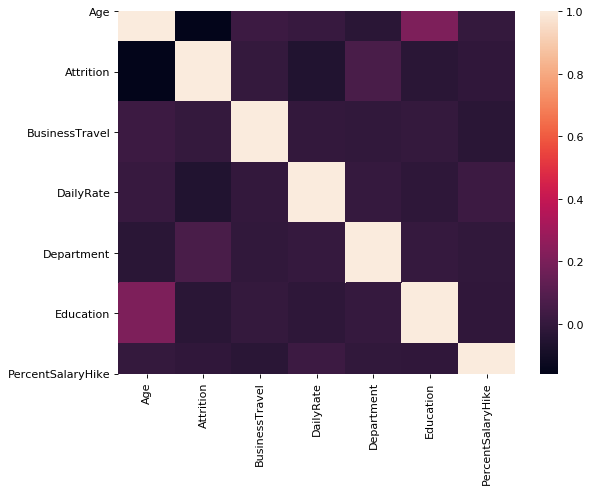

In [81]:
# now look at the heat map again... it should have all 7 columns
corr = data.corr()
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

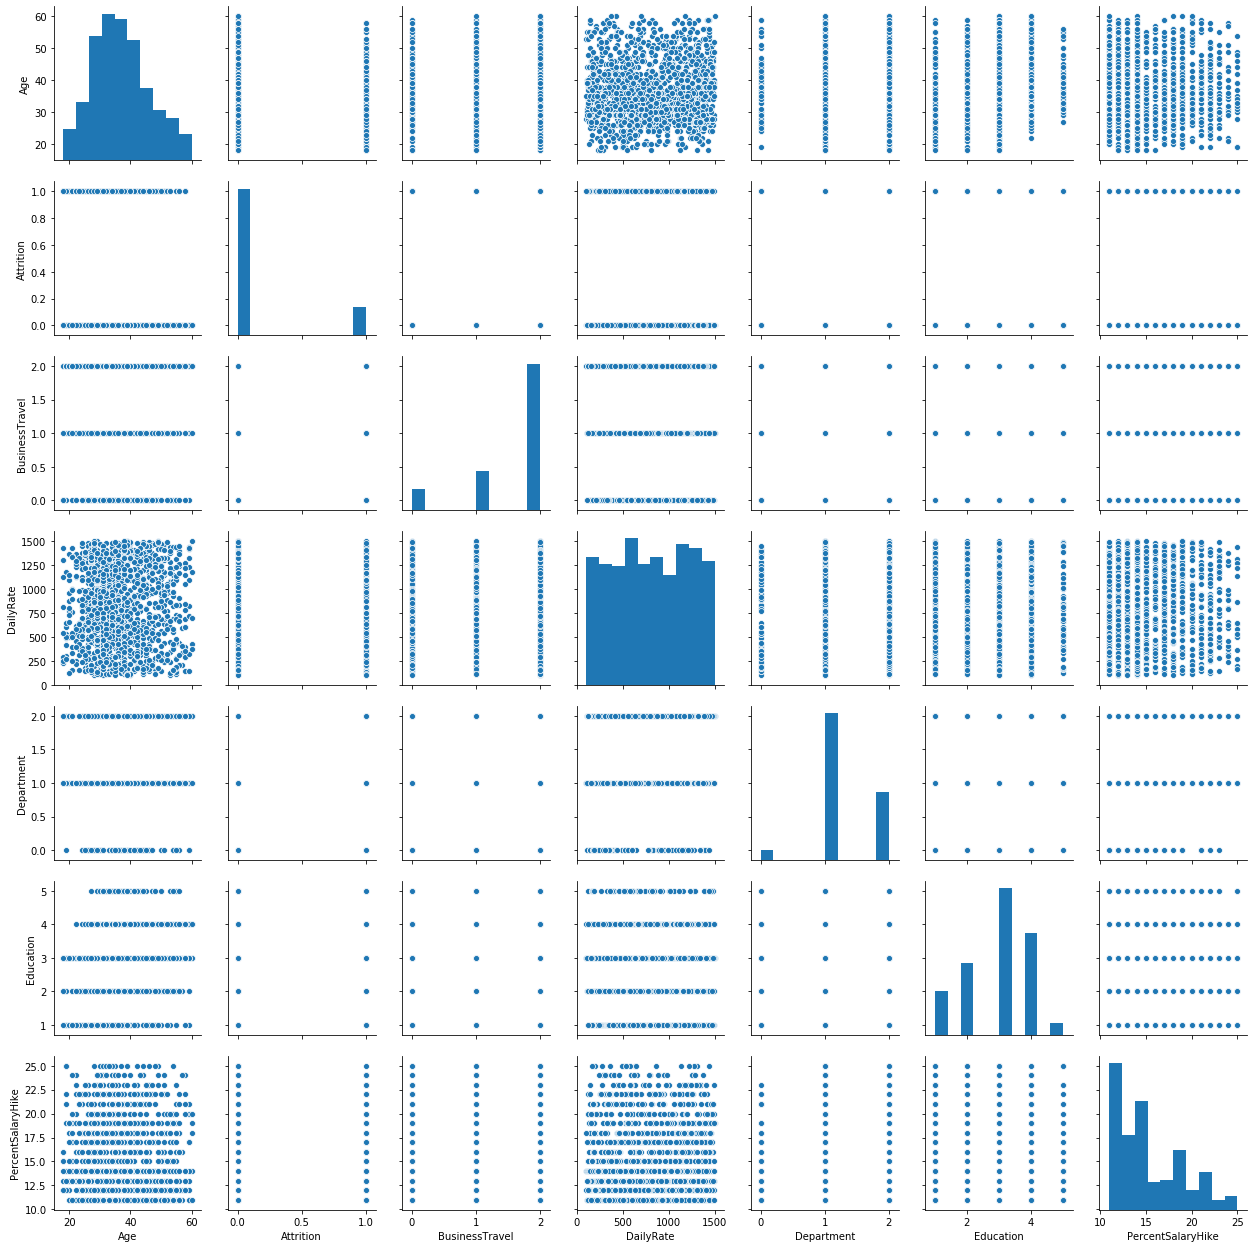

In [82]:
# and take a look at the collection of scatter plots too
sns.pairplot(data)